<a href="https://www.kaggle.com/code/shandeep777/flight-delay-eda?scriptVersionId=229410190" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#### Flight Data Explorations 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import glob
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)

In [2]:
plt.style.use('seaborn-dark-palette')

In [3]:
column_subset = [
    "FlightDate",
    "Airline",
    "Flight_Number_Marketing_Airline",
    "Origin",
    "Dest",
    "Cancelled",
    "Diverted",
    "CRSDepTime",
    "DepTime",
    "DepDelayMinutes",
    "OriginAirportID",
    "OriginCityName",
    "OriginStateName",
    "DestAirportID",
    "DestCityName",
    "DestStateName",
    "TaxiOut",
    "TaxiIn",
    "CRSArrTime",
    "ArrTime",
    "ArrDelayMinutes"
]

#### Read in and Formatig Data

In [4]:
path = "/kaggle/input/flight-delay-dataset-20182022"

parquet_files = glob.glob(f"{path}/*.parquet")


df = pd.concat([pd.read_parquet(file, columns=column_subset) for file in parquet_files], ignore_index=True)

df.head()

,FlightDate,Airline,Flight_Number_Marketing_Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",4301,GJT,DEN,False,False,1133,1123.0,0.0,11921,"Grand Junction, CO",Colorado,11292,"Denver, CO",Colorado,17.0,8.0,1245,1228.0,0.0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",4299,HRL,IAH,False,False,732,728.0,0.0,12206,"Harlingen/San Benito, TX",Texas,12266,"Houston, TX",Texas,16.0,9.0,849,848.0,0.0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",4298,DRO,DEN,False,False,1529,1514.0,0.0,11413,"Durango, CO",Colorado,11292,"Denver, CO",Colorado,21.0,14.0,1639,1636.0,0.0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",4296,IAH,GPT,False,False,1435,1430.0,0.0,12266,"Houston, TX",Texas,11973,"Gulfport/Biloxi, MS",Mississippi,16.0,4.0,1605,1547.0,0.0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",4295,DRO,DEN,False,False,1135,1135.0,0.0,11413,"Durango, CO",Colorado,11292,"Denver, CO",Colorado,19.0,8.0,1245,1251.0,6.0


In [5]:
cat_cols = ['OriginStateName','DestStateName','Origin','Dest','Airline']
for i in cat_cols:
    df[i] = df[i].astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29193782 entries, 0 to 29193781
Data columns (total 21 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   FlightDate                       datetime64[us]
 1   Airline                          category      
 2   Flight_Number_Marketing_Airline  int64         
 3   Origin                           category      
 4   Dest                             category      
 5   Cancelled                        bool          
 6   Diverted                         bool          
 7   CRSDepTime                       int64         
 8   DepTime                          float64       
 9   DepDelayMinutes                  float64       
 10  OriginAirportID                  int64         
 11  OriginCityName                   object        
 12  OriginStateName                  category      
 13  DestAirportID                    int64         
 14  DestCityName                    

#### Understand the `DepDelayMinutes` Variable

In [7]:
df.query("DepDelayMinutes != 0")['DepDelayMinutes'].value_counts()

DepDelayMinutes
1.0       586538
2.0       469218
3.0       412742
4.0       373030
5.0       342582
           ...  
1823.0         1
2161.0         1
1709.0         1
2141.0         1
1844.0         1
Name: count, Length: 1861, dtype: int64

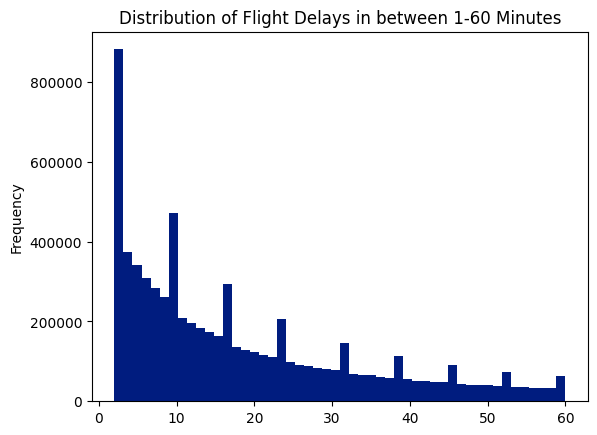

In [8]:
df.query("DepDelayMinutes > 1 and DepDelayMinutes < 61")['DepDelayMinutes'].plot(kind='hist', bins=50, 
                                                                                   title='Distribution of Flight Delays in between 1-60 Minutes')
plt.show()

In [9]:
df[['CRSDepTime','DepTime','DepDelayMinutes']]

,CRSDepTime,DepTime,DepDelayMinutes
0,1133,1123.0,0.0
1,732,728.0,0.0
2,1529,1514.0,0.0
3,1435,1430.0,0.0
4,1135,1135.0,0.0
...,...,...,...
29193777,640,634.0,0.0
29193778,640,631.0,0.0
29193779,640,632.0,0.0
29193780,640,630.0,0.0


#### Grouping Delays 

In [10]:
df['DepDelayMinutes'].value_counts()

DepDelayMinutes
0.0       19246084
1.0         586538
2.0         469218
3.0         412742
4.0         373030
            ...   
1823.0           1
2161.0           1
1709.0           1
2141.0           1
1844.0           1
Name: count, Length: 1862, dtype: int64